#  import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing dataset

In [2]:
df = pd.read_csv('aug_train.csv.zip')
#make a copy of dataframe(df)
df_copy = df.copy()
df_copy.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df_copy.isna().sum();

In [5]:
x = df_copy.drop('target',axis=1)
y = df_copy['target']

In [6]:
#performing EDA on daaset
# for columns,contents in df_copy.items():
#     if pd.api.types.is_string_dtype(contents):
#         print(columns)

In [7]:
for columns,contents in df_copy.items():
    if pd.api.types.is_numeric_dtype(contents):
        if pd.isna(contents).sum():
            df_copy[columns] = contents.fillna(contents.median())
            
for columns,contents in df_copy.items():
    if pd.api.types.is_string_dtype(contents):
        df_copy[columns] = pd.Categorical(contents).codes+1

In [8]:
df_copy.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [9]:
corr = df_copy.corr()
corr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,1.000000,-0.011566,-0.040455,0.047724,0.043359,-0.036285,-0.025997,-0.009837,0.001216,-0.024174,-0.044278,-0.024534,0.000998,0.049475
city,-0.011566,1.000000,-0.326104,-0.037927,0.006154,-0.078636,0.002207,0.023856,-0.041468,-0.010395,-0.033585,-0.012420,0.009537,0.056233
city_development_index,-0.040455,-0.326104,1.000000,0.152961,-0.059808,0.182541,0.073095,-0.055099,0.040492,0.057742,0.068513,0.027665,0.001920,-0.341665
gender,0.047724,-0.037927,0.152961,1.000000,-0.103032,0.112526,-0.007901,0.033729,0.014335,0.028411,0.059255,0.044949,-0.002380,-0.076416
relevent_experience,0.043359,0.006154,-0.059808,-0.103032,1.000000,-0.374705,0.047225,-0.303115,-0.009325,-0.308171,-0.324933,0.163729,-0.011566,0.128430
enrolled_university,-0.036285,-0.078636,0.182541,0.112526,-0.374705,1.000000,0.080790,0.147559,0.025274,0.195539,0.231285,-0.005341,0.001936,-0.148072
education_level,-0.025997,0.002207,0.073095,-0.007901,0.047225,0.080790,1.000000,-0.116546,0.016587,-0.003478,-0.003744,0.057100,-0.014019,-0.080352
major_discipline,-0.009837,0.023856,-0.055099,0.033729,-0.303115,0.147559,-0.116546,1.000000,0.011101,0.180351,0.205819,-0.142176,-0.005891,0.055429
experience,0.001216,-0.041468,0.040492,0.014335,-0.009325,0.025274,0.016587,0.011101,1.000000,-0.027598,-0.020507,0.063920,-0.006423,-0.009147
company_size,-0.024174,-0.010395,0.057742,0.028411,-0.308171,0.195539,-0.003478,0.180351,-0.027598,1.000000,0.523119,-0.122278,0.008203,-0.186320


In [10]:
df_copy.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,6,0.920,2,1,3,1,6,22,0,0,1,36,1.0
1,29725,78,0.776,2,2,3,1,6,7,5,6,5,47,0.0
2,11561,65,0.624,0,2,1,1,6,16,0,0,6,83,0.0
3,33241,15,0.789,0,2,0,1,2,21,0,6,6,52,1.0
4,666,51,0.767,2,1,3,3,6,22,5,2,4,8,0.0


In [11]:
X = df_copy.drop('target',axis=1)
Y = df_copy['target']

<AxesSubplot:>

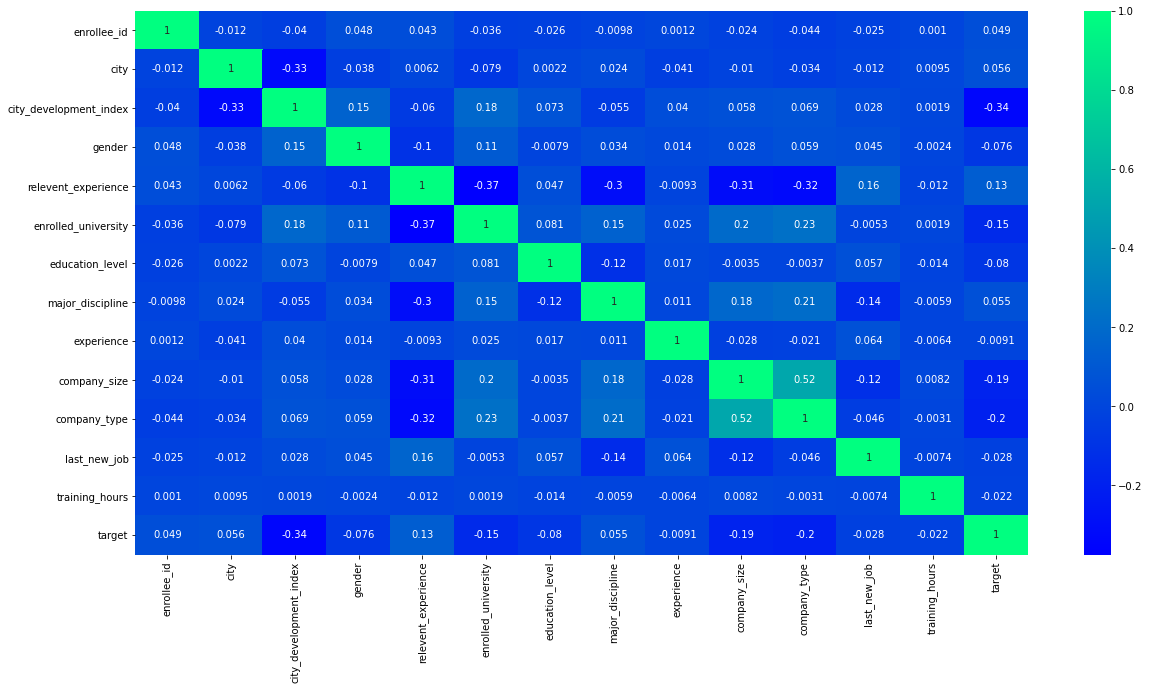

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,
            annot=True,
            cmap='winter',)

<AxesSubplot:>

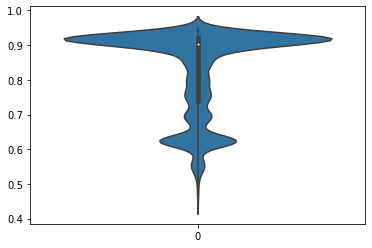

In [13]:
sns.violinplot(data=df_copy.city_development_index)

In [14]:
#sns.swarmplot(y='city',x='gender',data=df_copy)

In [15]:
#sns.pairplot(data=df_copy)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LinearRegression
RFC = RandomForestClassifier()
RFR = RandomForestRegressor()
LR = LinearRegression()

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2)

In [38]:
#function to fit my model ,predict and scoring
def fit_model(model,xtrain,ytrain,xtest,ytest):
    score = {}
    model = model.fit(xtrain,ytrain)
    prediction = model.predict(xtest)
    score = accuracy_score(ytest,prediction)
    print(f'the accuracy of model,{model},is:{score}')
    return score
from sklearn.cluster import k_means
km = k_means()

TypeError: k_means() missing 2 required positional arguments: 'X' and 'n_clusters'

In [19]:
fit_model(model=RFC,
         xtrain=X_train,
         ytrain=Y_train,
         xtest=X_test,
         ytest=Y_test)

the accuracy of model,RandomForestClassifier(),is:0.7873173277661796


0.7873173277661796

In [23]:
Y_test

1986     0.0
16277    0.0
13549    0.0
3751     0.0
1482     0.0
        ... 
4331     0.0
9276     0.0
3098     0.0
12610    0.0
12469    1.0
Name: target, Length: 3832, dtype: float64

In [25]:
 model = LR.fit(X_train,Y_train)
prediction = model.predict(X_test)
prediction = pd.Series(prediction)
#score = model.score(Y_test,prediction)

In [ ]:
#score = model.score(Y_test,prediction)

In [26]:
cr = cross_validate(estimator=RFC,
                    X=X,
                    y=Y,
                    cv=5,
                   verbose=2,)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   4.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] ................................................. , total=   3.5s
[CV]  ................................................................
[CV] ................................................. , total=   3.5s
[CV]  ................................................................
[CV] ................................................. , total=   3.7s
[CV]  ................................................................
[CV] ................................................. , total=   3.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.6s finished


In [ ]:
cr

In [27]:
from sklearn.model_selection import RandomizedSearchCV
param = {
         'bootstrap':[True,False],
         'max_depth':[10,20,30,40,50,60,70,80,90,100,None],
         'max_features':['auto','sqrt'],
         'min_samples_leaf':[1,2,4],
         'min_samples_split':[2,5,10],
         'n_estimators':[20,50,100,400,500,1000,2500,2000]
        }

RandomCV = RandomizedSearchCV(estimator=RFC,
                             param_distributions=param,
                             n_jobs=-1,
                             cv=5,
                             verbose=2
                             )

In [28]:
RandomCV.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 50, 100, 400, 500,
                                                         1000, 2500, 2000]},
                   verbose=2)

In [29]:
RandomCV.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [30]:
RandomCV.best_score_

0.7940803079372812

In [31]:
model = RFC.fit(X_train,Y_train)
prediction = model.predict(X_test)
score = accuracy_score(Y_test,prediction)

In [32]:
score

0.7860125260960334

In [37]:
CR = classification_report(Y_test,prediction)
CR

'              precision    recall  f1-score   support\n\n         0.0       0.84      0.88      0.86      2883\n         1.0       0.58      0.49      0.53       949\n\n    accuracy                           0.79      3832\n   macro avg       0.71      0.69      0.70      3832\nweighted avg       0.78      0.79      0.78      3832\n'

In [34]:
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))
print(accuracy_score(Y_test,prediction))

0.5805243445692884
0.48998946259220233
0.5314285714285715
0.7860125260960334
